#                       Esercitazione 4 - 12 Marzo 2023

Esplorate le caratteristiche dell'insieme dei numeri di macchina F($\beta$,t,L,U) sul vostro calcolatore utilizzando il comando sys.float_info, dopo aver importato im modulo sys:

import sys

print(sys.float_info)

In [31]:
import sys
import numpy as np
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


min_exp=-1021   (L=-1021-1=-1022)

max_exp=1024    (U=1024-1=1023)

mant_dig=53 (incluso l'hidden bit)

dig=15, significa che i numeri "float" vengono convertiti in stringhe con un massimo di 15 cifre decimali. Le cifre decimali oltre la quindicesima vengono eliminate (troncate). (solo a livello di stringa visualizzata)

- **1.**  Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?
  

In [24]:
# ricorda: per usare le var di sys.float_info
# metti un'altro punto e poi definisci il nome della
# variabile
x = 2**52
b = 2**53
p = 52
B = 2
spacing = 2**(p+1-sys.float_info.mant_dig)
print(spacing)

print("valore x =", x)
y = x+spacing
print("numero dopo 2^52:", y)

z = x+0.5
print("z = ", z)

q = y+0.5
print("q = ", q)
# penso che ci sia un comportamento del rounding to even
# z visto che l'ultimo valore della mantissa era pari
# non è avvenuto nessun incremento, mentre in q l'ultimo valore
# era dispari e ha troncato facendolo diventare pari


1
valore x = 4503599627370496
numero dopo 2^52: 4503599627370497
z =  4503599627370496.0
q =  4503599627370498.0


- **2** Calcolare la cardinalità dell'insieme dei numeri finiti di Python

In [28]:
card_num_pos = (B**(t-1))*(B-1)*(sys.float_info.max_exp - sys.float_info.min_exp + 1)

card_num_finiti = (2*card_num_pos)+1
print(card_num_finiti)

18428729675200069633


- **3**  Verificare numericamente che $\texttt{eps} = 2^{-52}$, spacing nell'intervallo $[1, 2]$,
è il piu' piccolo $x$ tale che $fl(1 + x)$ è  diverso da $1$. 


In [30]:
esp = B**(1-sys.float_info.mant_dig)
y = esp + 1
print(y)

1.0000000000000002


- **4** Costruire un numpy array costituito da n=10 valori tutti uguali a 0.1
-     Effettuate la somma utilizzando un ciclo for.
-     Effettuate la somma effettuando la somma con la funzione sum del modulo numpy.
  Cosa osservate? Cercate di giustificare i risultati 

In [39]:
arr = np.array([0.1 for x in range(10)])

s1=0
s2=0

for var in arr:
    s1+=var
    
s2 = np.sum(arr)

print("somma fatta con il for: ", s1)
print("somma fatta con la funzione numpy: ", s2)
# visto che uno è una somma fatto con il nostro
# algoritmo avviene un'arrotodamento del linguaggio macchina
# mentre invece la funzione dato che è ottimizzata
# da un valore esatto

somma fatta con il for:  0.9999999999999999
somma fatta con la funzione numpy:  1.0


- **5.** Siano $a=1.234567890123400 e+15$, $b=-1.234567890123401 e+15$, $c=0.06$. 
  Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$. Che cosa si osserva? Ripetere l'esercizio con $a=0.23371258 e-4$, $b=0.33678429 e+2$, $c=-0.33677911 e+2$.

In [1]:
a=1.234567890123400e+15 
b=-1.234567890123401e+15
c=0.06

print("(a+b)+c = ", (a+b)+c)
print("(a+c)+b = ", (a+c)+b)
print("a+(b+c) = ", a+(b+c))

# si nota che nel calcolatore, visto che vengono
# usati i numeri floating point le proprietà dei numeri
# reali non vengono rispettate, tra cui qui la proprietà
# associativa

a=0.23371258e-4
b=0.33678429e+2 
c=-0.33677911e+2

print("(a+b)+c = ", (a+b)+c)
print("(a+c)+b = ", (a+c)+b)
print("a+(b+c) = ", a+(b+c))

(a+b)+c =  -0.94
(a+c)+b =  -1.0
a+(b+c) =  -1.0
(a+b)+c =  0.0005413712580022434
(a+c)+b =  0.0005413712580022434
a+(b+c) =  0.0005413712579995743


- **6.** Si considerino le espressioni $y_1=\sqrt{x^2+1}-x$ e $y_2=\frac{1}{\sqrt{x^2+1}+x}$. Calcolare il valore di $y_1$ e $y_2$ per $x=7777$ e $x=77777777$. Che cosa si osserva? Commentare i risultati ottenuti.

In [4]:
import math
y1 = lambda x : math.sqrt(x**2 + 1) - x
y2 = lambda x : 1 / (math.sqrt(x**2 + 1) + x)

x1 = 7777.0
x2 = 77777777.0

print("Calcoli fatti con x1")
print(y1(x1))
print(y2(x1))
print("Calcoli fatti con x2")
print(y1(x2))
print(y2(x2))

# dato che il risultato proveniente in y1(x2) è andato
# in underflow è venuto tutto approssimanto a 0

Calcoli fatti con x1
6.429214317904552e-05
6.429214323431402e-05
Calcoli fatti con x2
0.0
6.428571492857143e-09


- **7.** Valutare in aritmetica floating point l'espressione
$$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$,  Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$$
B(x)=\frac{1}{x (x+1)}.
$$ Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000, 100000000000, 1000000000000, 10000000000000, 100000000000000, 1000000000000000, 10000000000000000, 100000000000000000, 1000000000000000000, 10000000000000000000]


<function matplotlib.pyplot.show(close=None, block=None)>

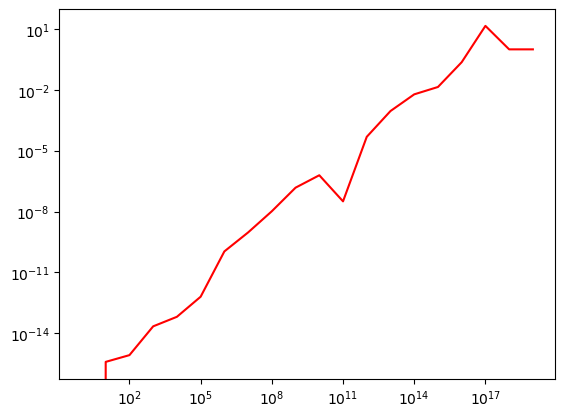

In [16]:
import matplotlib.pyplot as plt
import numpy as np

A = lambda x : (1/x) - (1/(x+1)) # ris. approssimato
B = lambda x : 1/(x*(x+1)) # ris. esatto

x = [10**z for z in range(20)]

print(x)
err_rel = [np.abs(A(x[i])-B(x[i]))/np.abs(B(x[i])) for i in range(20)]

plt.loglog(x,err_rel,'r')
plt.show

- **8-**  Risolvere l'equazione $x^2+10^k x+1=0$ con k in range(1,9). 

- Scrivere un codice Python che calcola le due radici: x1=(-b+sqrt(Delta))/2  e x2=(-b-sqrt(Delta))/2, dove Delta=b^2-4ac,  per tutti i valori di k in range(1,9)

- Calcolare l'errore relativo della soluzione numerica x1 rispetto alla soluzione in aritmetica reale, che per valori di k alti è  uguale a $10^{-k}$, altrimenti è una sua approssimazione. 

- Visualizzare l'errore relativo per ogni valore di k.

- Proporre un algoritmo aleternativo per il calcolo di una delle due soluzioni, che fornisca errore relativo inferiore.

[-0.10102051443364424, -0.010001000200048793, -0.0010000010000226212, -0.00010000000111176632, -1.0000003385357559e-05, -1.00000761449337e-06, -9.96515154838562e-08, -7.450580596923828e-09, 0.0]
[-9.898979485566356, -99.98999899979995, -999.998999999, -9999.999899999999, -99999.99999, -999999.999999, -9999999.9999999, -100000000.0, -1000000000.0]
[-0.1, -0.01, -0.001, -0.0001, -1e-05, -1e-06, -1e-07, -1e-08, -1e-09]
[0.010205144336442318, 0.00010002000487927681, 1.0000226211351326e-06, 1.1117663186550539e-08, 3.3853575579092333e-07, 7.614493370101404e-06, 0.003484845161437943, 0.2549419403076172, 1.0]
[0.010205144336442318, 0.00010002000487927681, 1.0000226211351326e-06, 1.1117663186550539e-08, 3.3853575579092333e-07, 7.614493370101404e-06, 0.003484845161437943, 0.2549419403076172, 1.0]


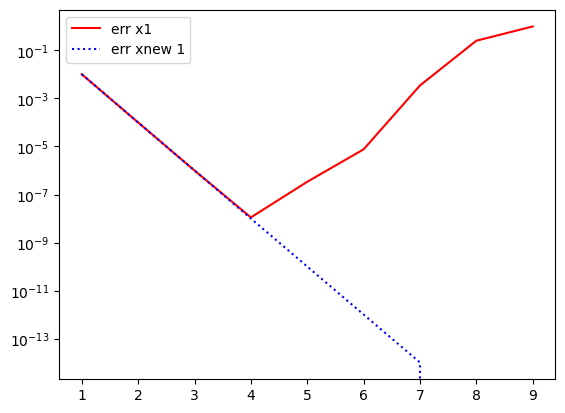

In [33]:
#f = lambda x,k : x**2 + (10**k)*x + 1
delta = lambda a,b,c : (b**2)-(4*a*c)
x1 = lambda a,b,c : (-b + math.sqrt(delta(a,b,c)))/2 
x2 = lambda a,b,c : (-b - math.sqrt(delta(a,b,c)))/2


k = [x for x in range(1,10)]
all_b = [10**x for x in k]

x1vera = [-10**(-x) for x in k] #N.B. questa è la soluzione esatta per k grandi, altrimenti è un approssimazione.
#print(all_b)
a = 1
c = 1

# soluzioni approssimate
sol_x1 = [x1(a,y,c) for y in all_b]
sol_x2 = [x2(a,y,c) for y in all_b]

print(sol_x1)
print(sol_x2)

x1new = lambda a,b,c : c/(a*x2(a,b,c))

#soluzioni con algoritmo alternativo
sol_x1_d = [x1new(a,y,c) for y in all_b]

print(all_b_real)

#errore relativo usando le soluzioni provenienti da x1
err_rel = [np.abs(x1vera[i]-sol_x1[i])/np.abs(x1vera[i]) for i in range(len(k))]
print(err_rel)
# errore relativo usando le soluzioni provenienti da un'algoritmo differente x1new
err_rel_new = [np.abs(x1vera[i]-sol_x1_d[i])/np.abs(x1vera[i]) for i in range(len(k))]
print(err_rel)

plt.plot(k,err_rel,'r-',k,err_rel_new,'b:')
plt.yscale('log')
plt.legend(["err x1", "err xnew 1"])
# morale: dal grafico si nota che usando l'algoritmo x1 l'errore relativo è molto grande
# k >= 9, mentre invece usando l'algoritmo x1new l'errore relativo tende ad essere molto piccolo


- **9.** Scrivere uno script Matlab che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. 

Visualizzare  un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.